In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import community
import community.community_louvain as community_louvain
import networkx as nx
import random
import collections
import csv
import seaborn as sns

In [2]:
def data_graph(dataset, delimiter):
    
    data = pd.read_csv(dataset, delimiter=delimiter)
    print(data.shape)
    data.columns = ['From','To']
    tempWeight = [1 for i in range(data.shape[0])]
    data['Weight'] = tempWeight
    print(data.head())
    
    graph = nx.Graph()
    # Adding the edges.
    for index,row in data.iterrows():
        graph.add_edges_from([(row[0],row[1])],weight = row[2])
    
    return data, graph

In [5]:
def transitivity(data, skip):
    pos = data.loc[data['Weight'] > 0]
    neg = data.loc[data['Weight'] < 0]
    graphP = nx.Graph()
    # Adding the edges.
    for index,row in pos.iterrows():
        graphP.add_edges_from([(row[0],row[1])])
    print('+ve Transitivity: ' + str(nx.transitivity(graphP)))
    if not skip:
        graphN = nx.DiGraph()
        # Adding the edges.
        for index,row in neg.iterrows():
            graphN.add_edges_from([(row[0],row[1])])
        print('-ve Transitivity: ' + str(nx.transitivity(graphN)))

In [11]:
def stats(data,graph, connected):
    # Number of nodes
    print('Nodes = ' + str(graph.number_of_nodes()))

    # Number of edges
    print('Edges = ' + str(graph.number_of_edges()))

    # Positive and negative edges 

    Stats = pd.DataFrame(graph.degree(),columns=['From','Degree']).sort_values('From')
    b= data.groupby('From',as_index=False)[['Weight']].sum().sort_values('From')
    c= data.groupby('To',as_index=False)[['Weight']].sum().sort_values('To')
    Stats = Stats.merge(b,on='From',how='left')
    Stats = Stats.drop(['Weight'],axis=1)
    Stats.fillna(0,inplace=True)
    print(Stats.head())
    
    print(Stats.describe())
    print(Stats.max(axis=0))
    
    print('Average Clustering = ' + str(nx.average_clustering(graph)))
    print('Transitivity = '+ str(nx.transitivity(graph)))
    print('Density = ' + str(nx.density(graph)))
    if not connected:
        print('Diameter = ' + str(nx.diameter(graph)))
        print('Radius = ' + str(nx.radius(graph)))
    print('Graph assortativity coefficient = '+ str(nx.degree_assortativity_coefficient(graph)))
    
    data['Weight'].plot.hist(bins=2, alpha=1, align='mid')
    plt.xlabel('Weight')
    plt.ylabel('Frequency')
    plt.title('Count of weight of edges')
    plt.xticks([-1,1])
    plt.show()
    
    return Stats

In [16]:
def degreeDistribution(data,graph):
    
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    #print(degreeCount)
    deg, cnt = zip(*degreeCount.items())
    #deg, cnt = np.array(deg), deg.array(cnt)
#     print(len(deg))
#     deg = deg[0:100]
#     cnt = cnt[0:100]
#     print(len(deg))
    print()
    plt.figure(figsize=(15, 5), dpi=80)
    plt.plot(deg,cnt,color="#3F5D7D")
    plt.xlabel('Degree /Number of Connections')
    plt.ylabel('Number of nodes')
    #plt.title('Actual Plot(Epinion)')
    #plt.grid()
    #plt.xlim([0, max(deg)])
    #plt.show()
    print()
    #plt.figure(figsize=(15, 5), dpi=80)
    plt.bar(deg,(cnt),color = 'r')
    #plt.plot(n1)
    #plt.plot(deg,(np.log(cnt)),color="#3F5D7D")
    #plt.xlabel('In-Degree /Number of Connections')
    #plt.ylabel('Number of nodes')
    #plt.title('Log Plot(Epinion)')
    plt.xlim([0, max(deg)])
    plt.grid()
    plt.show()
    

In [21]:
def degreeCentrality(graph, name):
    # Degree centrality stats
    print("Degree")
    degree_centrality_nodes = nx.degree_centrality(graph)
    degree_centrality_nodes = collections.Counter(degree_centrality_nodes)
    for k, v in degree_centrality_nodes.most_common(10):
        print ((k, v))
    with open(name+'_degreecentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in degree_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count))  
    DegreeCentrality = pd.read_csv(name+'_degreecentrality.csv', delimiter=',')
    
    return DegreeCentrality


def H_value(max_value,in_values):
  sum = np.sum(max_value - np.array(in_values))
  return sum

# Sample modified degree centrality
# According to the proposed approach the node with least
# degree centrality (as H value will be high for the most
# influential node and it is in the denominator) can be
# considered as the node with most number of connections and
# hence the most influential node.

# G = nx.gn_graph(10)
# G = nx.petersen_graph()
# subax2 = plt.subplot(121)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

def enhancedCentrality(graph, name):
  #A = nx.adjacency_matrix(graph)
  #B = A.astype(np.bool_)
  #C = B.toarray()

  #degree_centrality_nodes = nx.degree_centrality(graph)
  
  #values = list(degree_centrality_nodes.values())
  #values = [i*(len(values)-1) for i in values]
  #max_value = max(values)
  #sum = H_value(max_value,values)
  #print(sum)
  clustering_array = nx.clustering(graph)
  clustering_values = list(clustering_array.values())
  clustering_values = [float(i) for i in clustering_values]
  with open(name+'_clusteringCentrality.csv', encoding='utf-8-sig', mode='w') as fp:
    fp.write('col1\n')
    for val in clustering_values:  
      fp.write('{}\n'.format(val))

  #enhanced_degree_centrality = []
  #if name == 'Epinion':
  #  for i in range(len(C)):
  #    #temp = (float(max_value - in_degree_centrality_nodes[i])) * float(clustering_array[i]) /float(sum) 
  #    temp = (float(max_value - degree_centrality_nodes[i])) 
  #    enhanced_degree_centrality.append((i,temp))
  #else:
  #  for i,j in degree_centrality_nodes:
  #    temp = (float(max_value - j)) * float(clustering_array[i]) /float(sum) 
  #    enhanced_degree_centrality.append((i,temp))
    
  #enhanced_degree_centrality = [ (i,'%.12f' % elem) for i,elem in enhanced_degree_centrality ]
  # print(enhanced_degree_centrality)
  #file = open(name+'______enhancedDegreeCentrality.csv', 'w+', newline ='\n') 
  #with file:     
  #  write = csv.writer(file) 
  #  write.writerows(enhanced_degree_centrality) 
    
  #enhancedInDegreeCentrality = pd.read_csv(name+'_enhancedDegreeCentrality.csv', delimiter=',')
  clusteringCentrality = pd.read_csv(name+'_clusteringCentrality.csv', delimiter=',')
    
  return clusteringCentrality


def eigenVectorCentrality(graph, name):
    # Eigen Vector centrality stats
    print("Eigen Vector centrality")
    eigenvector_centrality_nodes = nx.eigenvector_centrality_numpy(graph)
    eigenvector_centrality_nodes = collections.Counter(eigenvector_centrality_nodes)
    for k, v in eigenvector_centrality_nodes.most_common(10):
        print ((k, v))
    with open(name+'_eigenvectorcentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in eigenvector_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 
            
    eigenvectorCentrality = pd.read_csv(name+'_eigenvectorcentrality.csv', delimiter=',')

    return eigenvectorCentrality


def khatzCentrality(graph,name):
    # Katz centrality stats
    # Not running on colab
    print("Katz centrality")
    katz_centrality_numpy_nodes = nx.katz_centrality_numpy(graph)
    katz_centrality_numpy_nodes = collections.Counter(katz_centrality_numpy_nodes)
#    for k, v in katz_centrality_numpy_nodes.most_common(10):
#      print ((k, v))
    with open(name+'_khatzcentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in katz_centrality_numpy_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 
            
    khatzCentrality = pd.read_csv(name+'_khatzcentrality.csv', delimiter=',')

    return khatzCentrality


def closenessCentrality(graph, name):
    # Closeness centrality stats
    # Not running on colab
    print("closeness centrality ")
    closeness_centrality_nodes = nx.closeness_centrality(graph)
    closeness_centrality_nodes = collections.Counter(closeness_centrality_nodes)
#    for k, v in closeness_centrality_nodes.most_common(10):
#        print ((k, v))
    with open(name+'_closenesscentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in closeness_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 
            
    closenessCentrality = pd.read_csv(name+'_closenesscentrality.csv', delimiter=',')

    return closenessCentrality



def betweenessCentrality(graph,name):
    # Betweenness centrality stats
    # Not running on colab
    print("Betweenness centrality ")
    betweenness_centrality_nodes = nx.betweenness_centrality(graph)
    betweenness_centrality_nodes = collections.Counter(betweenness_centrality_nodes)
#    for k, v in betweenness_centrality_nodes.most_common(10):
#        print ((k, v))
    with open(name+'_betweennessscentrality.csv', encoding='utf-8-sig', mode='w') as fp:
        fp.write('col1,col2\n')  
        for tag, count in betweenness_centrality_nodes.items():  
            fp.write('{},{}\n'.format(tag, count)) 
            
    betweennessCentrality = pd.read_csv(name+'_betweennessscentrality.csv', delimiter=',')

    return betweennessCentrality


In [4]:
cancer1_csv, cancer1_graph = data_graph('../data/Bone-Cancer.csv',",")
cancer2_csv, cancer2_graph = data_graph('../data/Bone-Normal.csv',",")

cancer3_csv, cancer3_graph = data_graph('../data/Breast-Cancer.csv',",")
cancer4_csv, cancer4_graph = data_graph('../data/Breast-Normal.csv',",")

cancer5_csv, cancer5_graph = data_graph('../data/Colon-Cancer.csv',",")
cancer6_csv, cancer6_graph = data_graph('../data/Colon-Normal.csv',",")

cancer7_csv, cancer7_graph = data_graph('../data/Kidney-Cancer.csv',",")
cancer8_csv, cancer8_graph = data_graph('../data/Kidney-Normal.csv',",")

cancer9_csv, cancer9_graph = data_graph('../data/Liver-Cancer.csv',",")
cancer10_csv, cancer10_graph = data_graph('../data/Liver-Normal.csv',",")

(1783, 2)
          From      To  Weight
0        4EBP1    AKT1       1
1        4EBP1   CCND1       1
2        4EBP1  MAPK14       1
3        4EBP1   TFDP1       1
4  14-3-3-zeta    AKT1       1
(619, 2)
          From       To  Weight
0        4EBP1     AKT1       1
1        4EBP1    CCND1       1
2  14-3-3-zeta     AKT1       1
3  14-3-3-zeta  CSNK1A1       1
4  14-3-3-zeta   CTNNB1       1
(3851, 2)
    From      To  Weight
0  4EBP1    AKT1       1
1  4EBP1   CCND1       1
2  4EBP1   EIF4E       1
3  4EBP1  MAPK14       1
4  4EBP1   TFDP1       1
(1696, 2)
          From       To  Weight
0  14-3-3-zeta     AKT1       1
1  14-3-3-zeta   CDC25A       1
2  14-3-3-zeta   CDC25B       1
3  14-3-3-zeta  CSNK1A1       1
4  14-3-3-zeta   CTNNB1       1
(4020, 2)
    From      To  Weight
0  4EBP1    AKT1       1
1  4EBP1   CCND1       1
2  4EBP1   EIF4E       1
3  4EBP1  MAPK14       1
4  4EBP1    PTEN       1
(1492, 2)
          From      To  Weight
0  14-3-3-zeta    AKT1       1
1  14-3-3

In [6]:
transitivity(cancer1_csv, True)
transitivity(cancer2_csv, True)
transitivity(cancer3_csv, True)
transitivity(cancer4_csv, True)
transitivity(cancer5_csv, True)
transitivity(cancer6_csv, True)
transitivity(cancer7_csv, True)
transitivity(cancer8_csv, True)
transitivity(cancer9_csv, True)
transitivity(cancer10_csv, True)

+ve Transitivity: 0.2619917012448133
+ve Transitivity: 0.2174735249621785
+ve Transitivity: 0.2694458261152942
+ve Transitivity: 0.2562935190144617
+ve Transitivity: 0.27236866674965765
+ve Transitivity: 0.24349688870753852
+ve Transitivity: 0.25414601655019814
+ve Transitivity: 0.21927885024236754
+ve Transitivity: 0.2555593436211477
+ve Transitivity: 0.2451476585917154


Nodes = 351
Edges = 1783
          From  Degree
0  14-3-3-zeta       7
1        4EBP1       4
2        ABIN2       9
3         ABL1      38
4         AIP4       7
           Degree
count  351.000000
mean    10.159544
std     10.641840
min      1.000000
25%      3.000000
50%      7.000000
75%     12.000000
max     66.000000
From      add1
Degree      66
dtype: object
Average Clustering = 0.22900659944437912
Transitivity = 0.2619917012448133
Density = 0.02902726902726903
Diameter = 7
Radius = 4
Graph assortativity coefficient = 0.1097787672621533


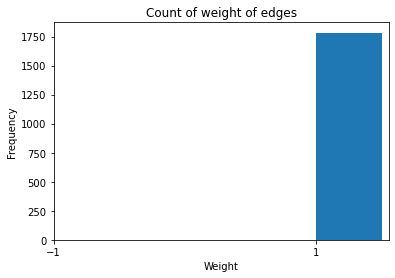

Nodes = 192
Edges = 619
          From  Degree
0  14-3-3-zeta       5
1        4EBP1       2
2         ABL1      19
3          AES       6
4         AKT1      13
           Degree
count  192.000000
mean     6.447917
std      6.909845
min      1.000000
25%      2.000000
50%      4.000000
75%      8.000000
max     40.000000
From      add1
Degree      40
dtype: object
Average Clustering = 0.20992505819372073
Transitivity = 0.2174735249621785
Density = 0.0337587260034904
Diameter = 7
Radius = 4
Graph assortativity coefficient = 0.01999607875759248


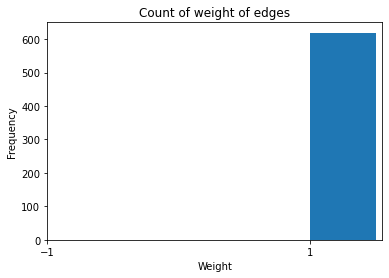

Nodes = 541
Edges = 3851
          From  Degree
0  14-3-3-zeta      13
1        4EBP1       5
2          A20       1
3        ABIN2      10
4         ABL1      56
           Degree
count  541.000000
mean    14.236599
std     15.599485
min      1.000000
25%      4.000000
50%      9.000000
75%     17.000000
max     98.000000
From      ZNF259
Degree        98
dtype: object
Average Clustering = 0.24454523273085424
Transitivity = 0.2694458261152942
Density = 0.026364072020264258
Diameter = 8
Radius = 4
Graph assortativity coefficient = 0.10457216913019161


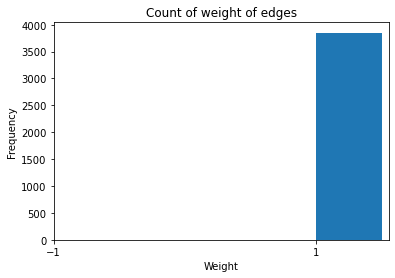

Nodes = 331
Edges = 1696
          From  Degree
0  14-3-3-zeta       9
1         ABL1      34
2       ACVRL1       8
3       ADAM17       7
4         ADD1      11
           Degree
count  331.000000
mean    10.247734
std     11.470342
min      1.000000
25%      3.000000
50%      7.000000
75%     12.000000
max     66.000000
From      ZNF259
Degree        66
dtype: object
Average Clustering = 0.22778479485541125
Transitivity = 0.2562935190144617
Density = 0.03105373981506912
Graph assortativity coefficient = 0.0674753766446557


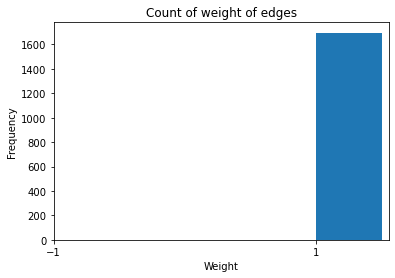

Nodes = 551
Edges = 4020
          From  Degree
0  14-3-3-zeta      11
1        4EBP1       6
2          A20       1
3        ABIN2      12
4         ABL1      56
           Degree
count  551.000000
mean    14.591652
std     16.400838
min      1.000000
25%      4.000000
50%     10.000000
75%     17.000000
max     98.000000
From      ZNF259
Degree        98
dtype: object
Average Clustering = 0.24817031630740163
Transitivity = 0.27236866674965765
Density = 0.026530275532090412
Diameter = 7
Radius = 4
Graph assortativity coefficient = 0.08951444408187743


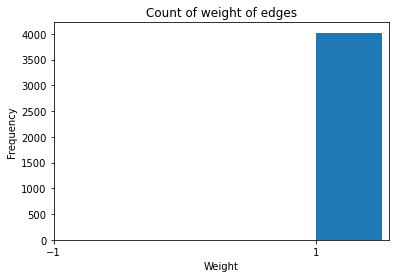

Nodes = 305
Edges = 1492
          From  Degree
0  14-3-3-zeta       7
1        ABIN2       7
2         ABL1      35
3       ADAM10       9
4         ADD1       7
           Degree
count  305.000000
mean     9.783607
std     10.373885
min      1.000000
25%      3.000000
50%      7.000000
75%     12.000000
max     63.000000
From      YES
Degree     63
dtype: object
Average Clustering = 0.2583520288654538
Transitivity = 0.24349688870753852
Density = 0.032182916307161344
Diameter = 8
Radius = 4
Graph assortativity coefficient = 0.05741267059891682


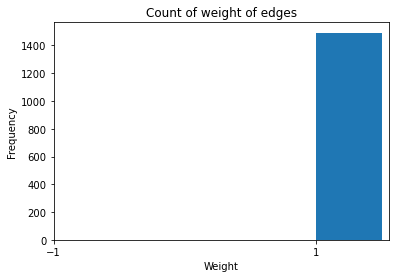

Nodes = 491
Edges = 3140
          From  Degree
0  14-3-3-zeta      11
1        4EBP1       6
2          A20       1
3        ABIN2       9
4         ABL1      52
           Degree
count  491.000000
mean    12.790224
std     14.518348
min      1.000000
25%      4.000000
50%      8.000000
75%     15.500000
max     91.000000
From      ZNF259
Degree        91
dtype: object
Average Clustering = 0.23386155943002146
Transitivity = 0.25414601655019814
Density = 0.026102498025686854
Diameter = 8
Radius = 5
Graph assortativity coefficient = 0.07456136052908217


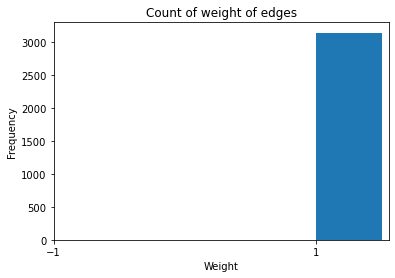

Nodes = 315
Edges = 1349
          From  Degree
0  14-3-3-zeta       7
1          A20       1
2        ABIN2       6
3         ABL1      26
4       ADAM10      10
           Degree
count  315.000000
mean     8.565079
std      9.221861
min      1.000000
25%      3.000000
50%      6.000000
75%     11.000000
max     59.000000
From      ZNF216
Degree        59
dtype: object
Average Clustering = 0.23151325781593027
Transitivity = 0.21927885024236754
Density = 0.02727732281872409
Graph assortativity coefficient = 0.02010401231894528


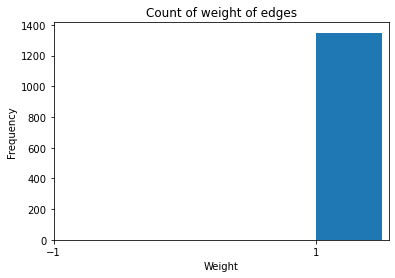

Nodes = 631
Edges = 4478
          From  Degree
0  14-3-3-zeta      11
1        4EBP1       5
2          A20       1
3        ABIN2       8
4         ABL1      71
           Degree
count  631.000000
mean    14.193344
std     17.500767
min      1.000000
25%      4.000000
50%      8.000000
75%     16.000000
max    114.000000
From      ZNF259
Degree       114
dtype: object
Average Clustering = 0.2632114349476605
Transitivity = 0.2555593436211477
Density = 0.02252911729932332
Diameter = 9
Radius = 5
Graph assortativity coefficient = 0.028394025721590322


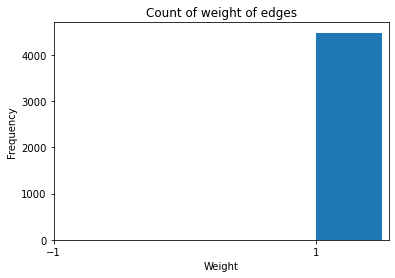

Nodes = 302
Edges = 1228
          From  Degree
0  14-3-3-zeta       6
1        4EBP1       3
2          A20       1
3        ABIN2       3
4         ADD1       7
           Degree
count  302.000000
mean     8.132450
std      8.791929
min      1.000000
25%      3.000000
50%      5.500000
75%     10.000000
max     54.000000
From      ZNF216
Degree        54
dtype: object
Average Clustering = 0.21690524929946156
Transitivity = 0.2451476585917154
Density = 0.027018107412378166
Diameter = 8
Radius = 4
Graph assortativity coefficient = 0.06633340783353364


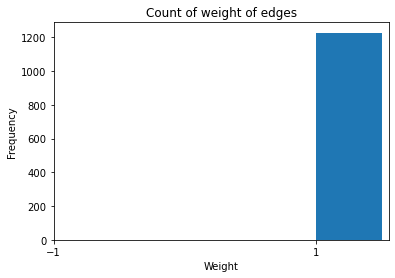

In [13]:
cancer1_Stats = stats(cancer1_csv, cancer1_graph, False)
cancer2_Stats = stats(cancer2_csv, cancer2_graph, False)
cancer3_Stats = stats(cancer3_csv, cancer3_graph, False)
cancer4_Stats = stats(cancer4_csv, cancer4_graph, True)
cancer5_Stats = stats(cancer5_csv, cancer5_graph, False)
cancer6_Stats = stats(cancer6_csv, cancer6_graph, False)
cancer7_Stats = stats(cancer7_csv, cancer7_graph, False)
cancer8_Stats = stats(cancer8_csv, cancer8_graph, True)
cancer9_Stats = stats(cancer9_csv, cancer9_graph, False)
cancer10_Stats = stats(cancer10_csv, cancer10_graph, False)

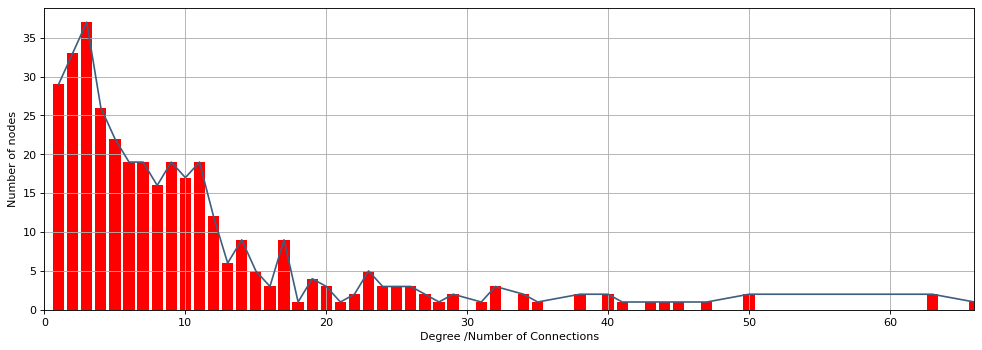

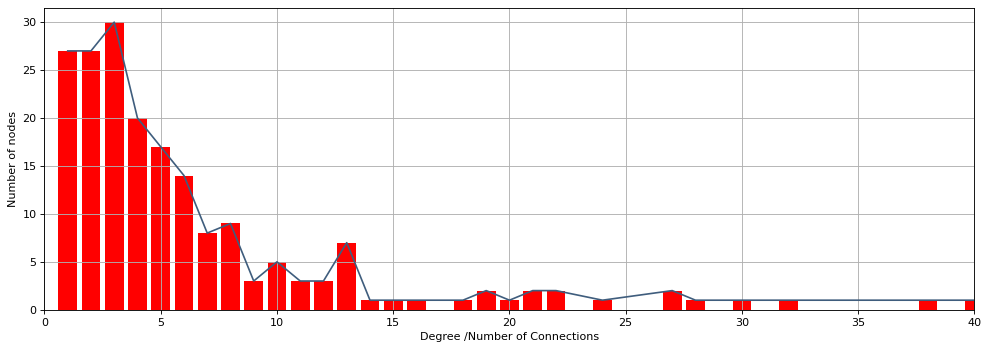

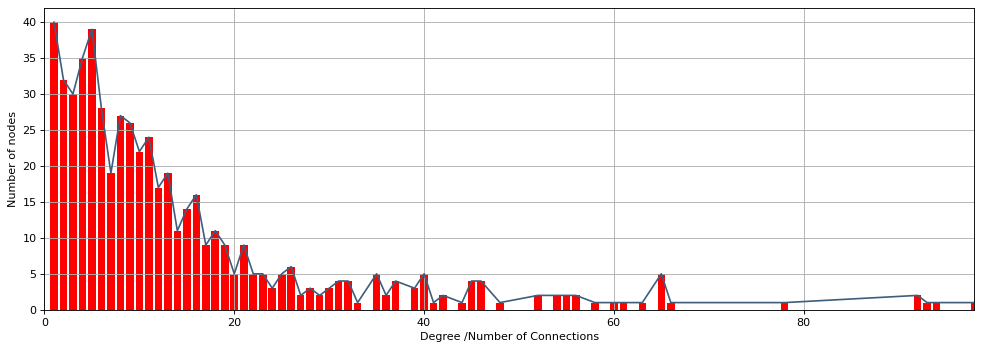

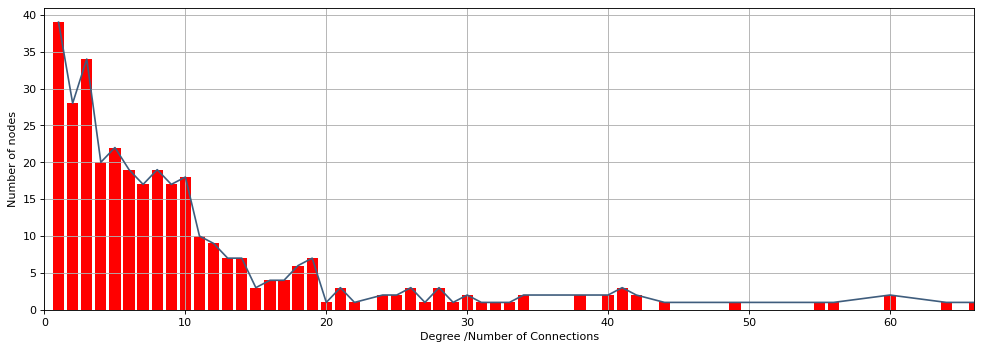

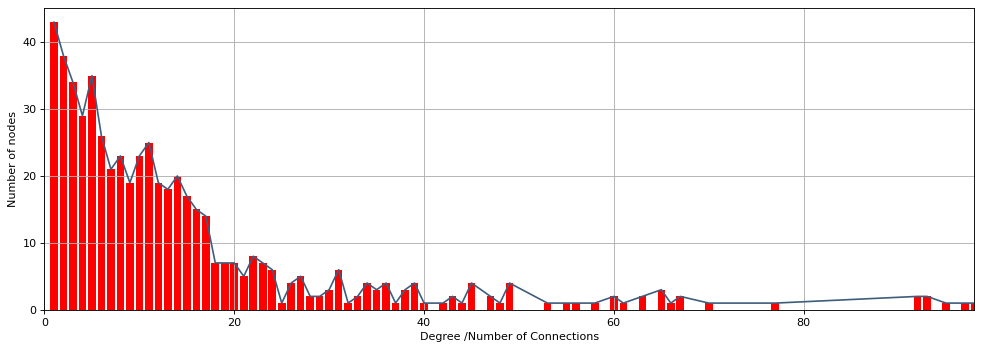

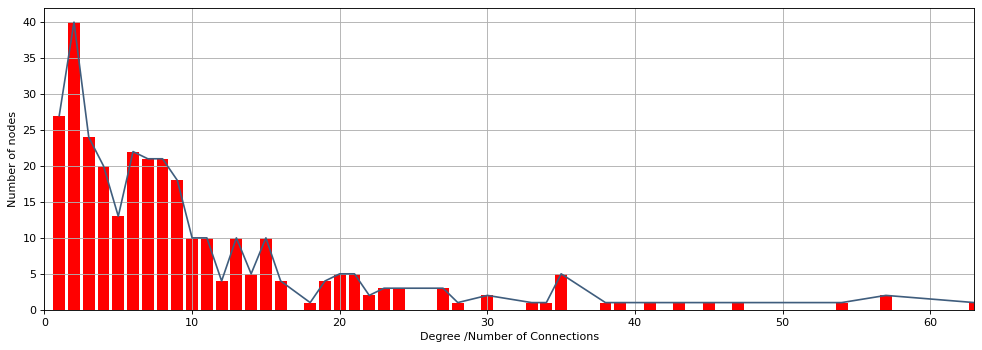

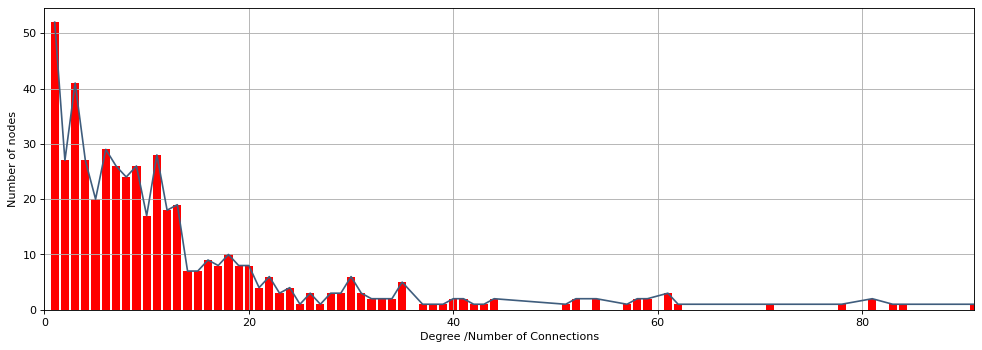

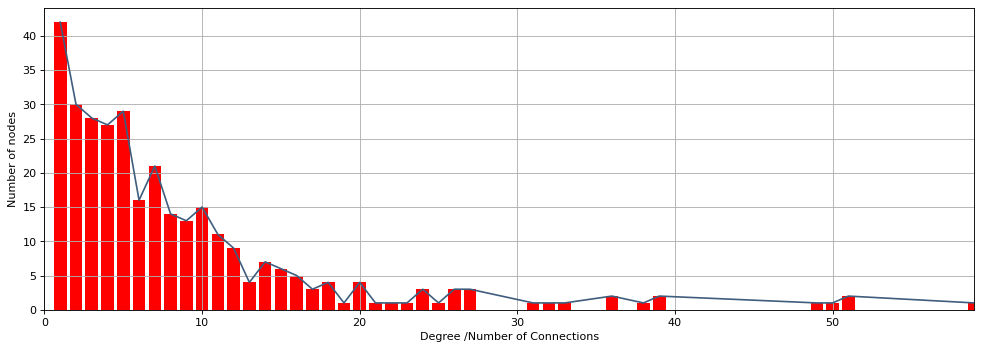

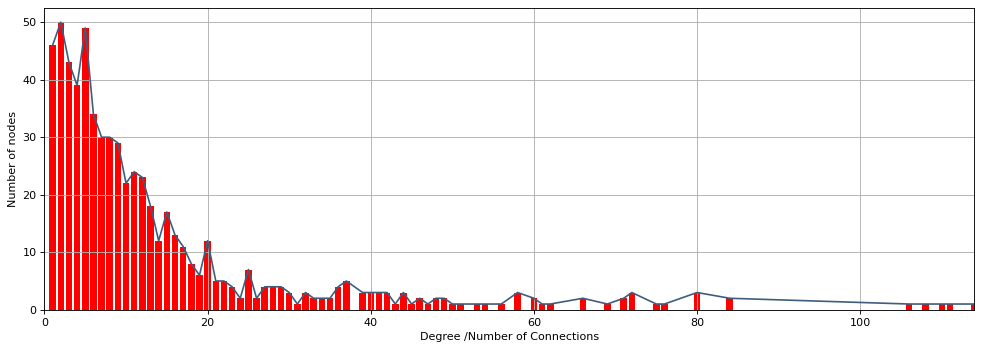

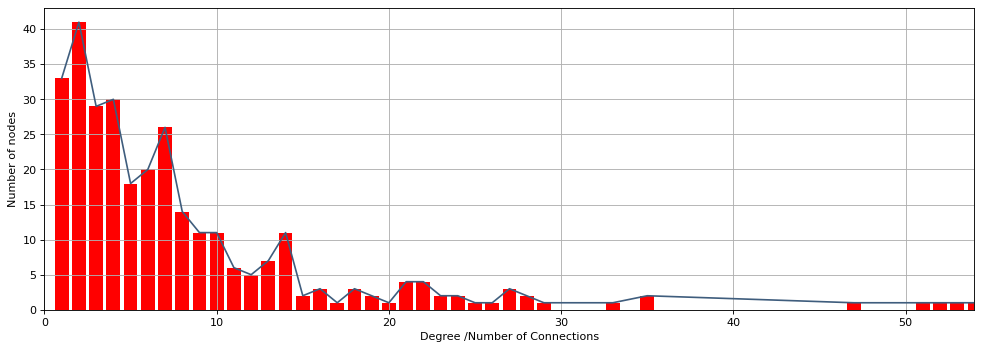

In [17]:
degreeDistribution(cancer1_csv, cancer1_graph)
degreeDistribution(cancer2_csv, cancer2_graph)
degreeDistribution(cancer3_csv, cancer3_graph)
degreeDistribution(cancer4_csv, cancer4_graph)
degreeDistribution(cancer5_csv, cancer5_graph)
degreeDistribution(cancer6_csv, cancer6_graph)
degreeDistribution(cancer7_csv, cancer7_graph)
degreeDistribution(cancer8_csv, cancer8_graph)
degreeDistribution(cancer9_csv, cancer9_graph)
degreeDistribution(cancer10_csv, cancer10_graph)

In [26]:
def connectedComp(graph):
    largest_cc = max(nx.connected_components(graph), key=len)
    weak_graph = graph.subgraph(largest_cc)
    return weak_graph


def powerLaw(Stats, graph):
    import math
    pos = Stats['Degree'][Stats['Degree'] != 0]
    pos = pos.transform(lambda x: math.floor(math.log(x)) )

    prob = pos.value_counts(normalize=True)
    threshold = 0.0001
    mask = prob > threshold
    tail_prob = prob.loc[~mask].sum()
    prob = prob.loc[mask]
    prob['other'] = tail_prob
    prob.plot(kind='bar',log=True,color='r')
    plt.title('Degree')
    plt.grid()
    plt.show()
    
    import igraph
    pos = Stats['Degree'][Stats['Degree'] != 0]
    print(igraph.power_law_fit(pos))

In [57]:
def degreeRelationship(Stats, graph, name):
    # Out degree and indegree relationship, relationship between positive and negative weighted outgoing 
    # edges in the network and relationship between positive and negative ingoing edges.
    
#     plt.figure(figsize=(5, 5), dpi=80)
#     plt.plot(Stats['Pos_out'],Stats['Neg_out'],'o',markersize=0.4, color = 'brown')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Positive Outdegree')
#     plt.ylabel('Negativetive Outdegree')
#     plt.title(name+' Outdegree(Pos-Neg) relationship')
#     plt.legend(['Node'])
#     plt.grid()
#     plt.show()
    
#     plt.figure(figsize=(5, 5), dpi=80)
#     plt.plot(Stats['Pos_in'],Stats['Neg_in'],'o',markersize=0.4, color = 'brown')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Positive Indegree')
#     plt.ylabel('Negativetive Indegree')
#     plt.title(name+' Indegree(Pos-Neg) relationship')
#     plt.legend(['Node'])
#     plt.grid()
#     plt.show()
    
#     plt.figure(figsize=(5, 5), dpi=80)
#     plt.plot(Stats['Outdegree'],Stats['Indegree'],'o',markersize=0.4, color = 'brown')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Outdegree')
#     plt.ylabel('Indegree')
#     plt.title(name+' Outdegree-Indegree relationship')
#     plt.legend(['Node'])
#     plt.grid()
#     plt.show()
    
    
    plt.figure(figsize=(5, 5), dpi=80)
    Deg_cor = nx.average_neighbor_degree(graph)
    dict_list = []
    for key, value in Deg_cor.items():
        temp = [key,value]
        temp[0] = graph.degree(key)
        dict_list.append(temp)
    dfa11 = pd.DataFrame(dict_list,columns =['Degree','Average neighbors Degree'])
    dfa21 = dfa11.groupby('Degree',as_index=False)['Average neighbors Degree'].mean()
    plt.plot(dfa11['Degree'],dfa11['Average neighbors degree'],'o',markersize=0.3, color = 'brown')
    plt.plot(dfa21['Degree'],dfa21['Average neighbors ddegree'],'o',markersize=1, color = 'yellow')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Average neighbors degree')
    plt.title(name+' Degree-Neighbour degree relationship')
    plt.legend(['Node','Mean at same degree'])
    plt.grid()
    plt.show()
    
    
#     plt.figure(figsize=(5, 5), dpi=80)
#     Deg_cor = nx.average_neighbor_degree(graph,target='in')
#     dict_list = []
#     for key, value in Deg_cor.items():
#         temp = [key,value]
#         temp[0] = graph.degree(key,'in')
#         dict_list.append(temp)
#     dfa12 = pd.DataFrame(dict_list,columns =['Indegree','Average neighbors indegree'])
#     # group same indegree values and take their mean
#     dfa22 = dfa12.groupby('Indegree',as_index=False)['Average neighbors indegree'].mean()
#     plt.plot(dfa12['Indegree'],dfa12['Average neighbors indegree'],'o',markersize=0.3, color = 'brown')
#     plt.plot(dfa22['Indegree'],dfa22['Average neighbors indegree'],'o',markersize=1, color = 'yellow')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Indegree')
#     plt.ylabel('Average neighbors indegree')
#     plt.title(name+' Indegree-Neighbour indegree relationship')
#     plt.legend(['Node','Mean at same indegree'])
#     plt.grid()
#     plt.show()
    
#     plt.figure(figsize=(5, 5), dpi=80)
#     plt.plot(dfa12['Indegree'],dfa11['Average neighbors outdegree'],'o',markersize=0.3, color = 'brown')
#     plt.plot(dfa22['Indegree'],dfa21['Average neighbors outdegree'],'o',markersize=1, color = 'yellow')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Indegree')
#     plt.ylabel('Average neighbors outdegree')
#     plt.title(name+' Indegree-Neighbour outdegree relationship')
#     plt.legend(['Node','Mean at same indegree'])
#     plt.grid()
#     plt.show()
    
#     plt.figure(figsize=(5, 5), dpi=80)
#     plt.plot(dfa11['Outdegree'],dfa12['Average neighbors indegree'],'o',markersize=0.3, color = 'brown')
#     plt.plot(dfa21['Outdegree'],dfa22['Average neighbors indegree'],'o',markersize=1, color = 'yellow')
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Outdegree')
#     plt.ylabel('Average neighbors indegree')
#     plt.title(name+' Outdegree-Neighbour indegree relationship')
#     plt.legend(['Node','Mean at same outdegree'])
#     plt.grid()
#     plt.show()
    
    
    
#     print('In-In assortativity coefficient = '+ str(nx.degree_assortativity_coefficient(graph,'in','in')))
#     print('Out-Out assortativity coefficient = '+ str(nx.degree_assortativity_coefficient(graph,'out','out')))
#     print('In-Out assortativity coefficient = '+ str(nx.degree_assortativity_coefficient(graph,'in','out')))
#     print('Out-In assortativity coefficient = '+ str(nx.degree_assortativity_coefficient(graph,'out','in')))
    print('Graph assortativity coefficient = '+ str(nx.degree_assortativity_coefficient(graph)))
    

In [23]:
c1c1  = degreeCentrality(cancer1_graph, 'BoneCancer')
c1c2 = eigenVectorCentrality(cancer1_graph, 'BoneCancer')
c1c3 = closenessCentrality(cancer1_graph, 'BoneCancer')
c1c4 = betweenessCentrality(cancer1_graph, 'BoneCancer')
c1c5 = khatzCentrality(cancer1_graph, 'BoneCancer')
c1c6 = enhancedCentrality(cancer1_graph, 'BoneCancer')

c2c1  = degreeCentrality(cancer2_graph, 'BoneNormal')
c2c2 = eigenVectorCentrality(cancer2_graph, 'BoneNormal')
c2c3 = closenessCentrality(cancer2_graph, 'BoneNormal')
c2c4 = betweenessCentrality(cancer2_graph, 'BoneNormal')
c2c5 = khatzCentrality(cancer2_graph, 'BoneNormal')
c2c6 = enhancedCentrality(cancer2_graph, 'BoneNormal')

c3c1  = degreeCentrality(cancer3_graph, 'BreastCancer')
c3c2 = eigenVectorCentrality(cancer3_graph, 'BreastCancer')
c3c3 = closenessCentrality(cancer3_graph, 'BreastCancer')
c3c4 = betweenessCentrality(cancer3_graph, 'BreastCancer')
c3c5 = khatzCentrality(cancer3_graph, 'BreastCancer')
c3c6 = enhancedCentrality(cancer3_graph, 'BreastCancer')

c4c1  = degreeCentrality(cancer4_graph, 'BreastNormal')
c4c2 = eigenVectorCentrality(cancer4_graph, 'BreastNormal')
c4c3 = closenessCentrality(cancer4_graph, 'BreastNormal')
c4c4 = betweenessCentrality(cancer4_graph, 'BreastNormal')
c4c5 = khatzCentrality(cancer4_graph, 'BreastNormal')
c4c6 = enhancedCentrality(cancer4_graph, 'BreastNormal')

c5c1  = degreeCentrality(cancer5_graph, 'ColonCancer')
c5c2 = eigenVectorCentrality(cancer5_graph, 'ColonCancer')
c5c3 = closenessCentrality(cancer5_graph, 'ColonCancer')
c5c4 = betweenessCentrality(cancer5_graph, 'ColonCancer')
c5c5 = khatzCentrality(cancer5_graph, 'ColonCancer')
c5c6 = enhancedCentrality(cancer5_graph, 'ColonCancer')

c6c1  = degreeCentrality(cancer6_graph, 'ColonNormal')
c6c2 = eigenVectorCentrality(cancer6_graph, 'ColonNormal')
c6c3 = closenessCentrality(cancer6_graph, 'ColonNormal')
c6c4 = betweenessCentrality(cancer6_graph, 'ColonNormal')
c6c5 = khatzCentrality(cancer6_graph, 'ColonNormal')
c4c6 = enhancedCentrality(cancer6_graph, 'ColonNormal')

c7c1  = degreeCentrality(cancer7_graph, 'KidneyCancer')
c7c2 = eigenVectorCentrality(cancer7_graph, 'KidneyCancer')
c7c3 = closenessCentrality(cancer7_graph, 'KidneyCancer')
c7c4 = betweenessCentrality(cancer7_graph, 'KidneyCancer')
c7c5 = khatzCentrality(cancer7_graph, 'KidneyCancer')
c7c6 = enhancedCentrality(cancer7_graph, 'KidneyCancer')

c8c1  = degreeCentrality(cancer8_graph, 'KidneyNormal')
c8c2 = eigenVectorCentrality(cancer8_graph, 'KidneyNormal')
c8c3 = closenessCentrality(cancer8_graph, 'KidneyNormal')
c8c4 = betweenessCentrality(cancer8_graph, 'KidneyNormal')
c8c5 = khatzCentrality(cancer8_graph, 'KidneyNormal')
c8c6 = enhancedCentrality(cancer8_graph, 'KidneyNormal')

c9c1  = degreeCentrality(cancer9_graph, 'LiverCancer')
c9c2 = eigenVectorCentrality(cancer9_graph, 'LiverCancer')
c9c3 = closenessCentrality(cancer9_graph, 'LiverCancer')
c9c4 = betweenessCentrality(cancer9_graph, 'LiverCancer')
c9c5 = khatzCentrality(cancer9_graph, 'LiverCancer')
c9c6 = enhancedCentrality(cancer9_graph, 'LiverCancer')

c10c1  = degreeCentrality(cancer10_graph, 'LiverNormal')
c10c2 = eigenVectorCentrality(cancer10_graph, 'LiverNormal')
c10c3 = closenessCentrality(cancer10_graph, 'LiverNormal')
c10c4 = betweenessCentrality(cancer10_graph, 'LiverNormal')
c10c5 = khatzCentrality(cancer10_graph, 'LiverNormal')
c10c6 = enhancedCentrality(cancer10_graph, 'LiverNormal')

Degree
('STAT1', 0.18857142857142858)
('FYN', 0.18)
('SMAD3', 0.18)
('STAT5B', 0.14285714285714285)
('ERK1', 0.14285714285714285)
('LYN', 0.13428571428571429)
('HDAC1', 0.12857142857142856)
('STAT3', 0.12571428571428572)
('CSK', 0.12285714285714286)
('SRC', 0.11714285714285715)
Eigen Vector centrality
('STAT1', 0.2414024440213811)
('FYN', 0.23628867555131602)
('STAT5B', 0.2060086019294528)
('SRC', 0.19698116652173236)
('LYN', 0.1963108549179626)
('STAT3', 0.19618489378969584)
('CSK', 0.19523709868547479)
('GRB2', 0.18999137340030714)
('CBL', 0.18613011802077217)
('CRKL', 0.18058002800159756)
closeness centrality 
Betweenness centrality 
Katz centrality
Degree
('SMAD3', 0.2094240837696335)
('FYN', 0.19895287958115185)
('ERK1', 0.16753926701570682)
('HDAC1', 0.15706806282722513)
('RELA', 0.14659685863874347)
('CSK', 0.14136125654450263)
('STAT5B', 0.14136125654450263)
('STAT3', 0.12565445026178013)
('GRB2', 0.11518324607329844)
('VAV1', 0.11518324607329844)
Eigen Vector centrality
('FYN'

In [24]:
c4_connected_graph = connectedComp(cancer4_graph)
c8_connected_graph = connectedComp(cancer8_graph)

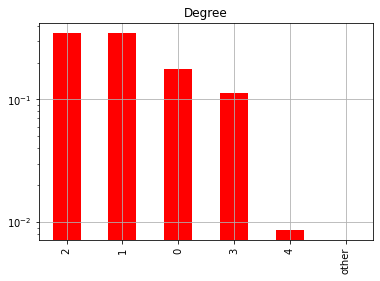

Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.597631
Cutoff (xmin)     = 9.000000

Log-likelihood    = -495.199266

H0: data was drawn from the fitted distribution

KS test statistic = 0.055091
p-value           = 0.752790

H0 could not be rejected at significance level 0.05


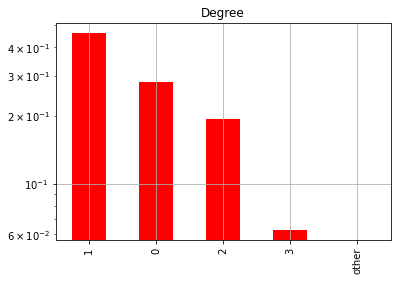

Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.377734
Cutoff (xmin)     = 5.000000

Log-likelihood    = -257.029656

H0: data was drawn from the fitted distribution

KS test statistic = 0.061423
p-value           = 0.894145

H0 could not be rejected at significance level 0.05


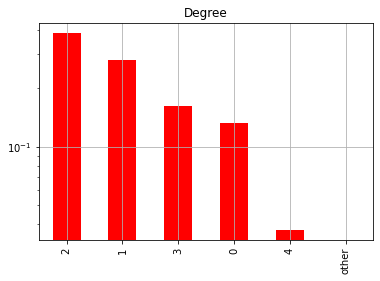

Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.491698
Cutoff (xmin)     = 13.000000

Log-likelihood    = -767.163642

H0: data was drawn from the fitted distribution

KS test statistic = 0.059001
p-value           = 0.482849

H0 could not be rejected at significance level 0.05


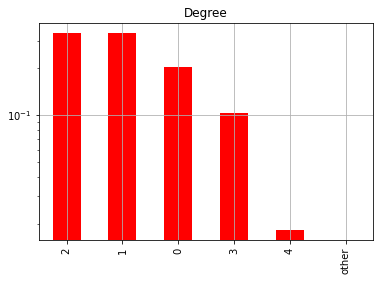

Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.419216
Cutoff (xmin)     = 8.000000

Log-likelihood    = -512.803077

H0: data was drawn from the fitted distribution

KS test statistic = 0.054315
p-value           = 0.760990

H0 could not be rejected at significance level 0.05


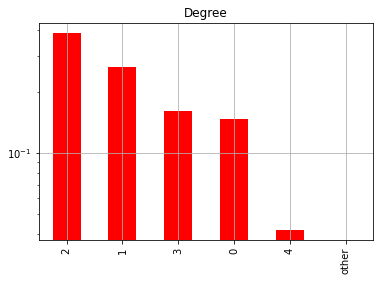

Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.460001
Cutoff (xmin)     = 12.000000

Log-likelihood    = -881.423816

H0: data was drawn from the fitted distribution

KS test statistic = 0.051026
p-value           = 0.573326

H0 could not be rejected at significance level 0.05


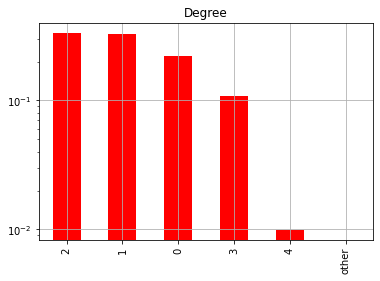

Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.403345
Cutoff (xmin)     = 7.000000

Log-likelihood    = -516.932414

H0: data was drawn from the fitted distribution

KS test statistic = 0.071295
p-value           = 0.394115

H0 could not be rejected at significance level 0.05


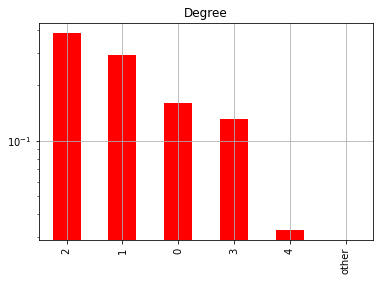

Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.511620
Cutoff (xmin)     = 11.000000

Log-likelihood    = -727.625511

H0: data was drawn from the fitted distribution

KS test statistic = 0.062322
p-value           = 0.412677

H0 could not be rejected at significance level 0.05


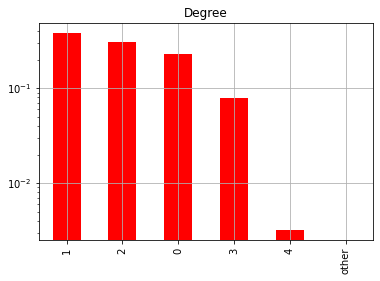

Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.792483
Cutoff (xmin)     = 10.000000

Log-likelihood    = -306.769083

H0: data was drawn from the fitted distribution

KS test statistic = 0.056198
p-value           = 0.925061

H0 could not be rejected at significance level 0.05


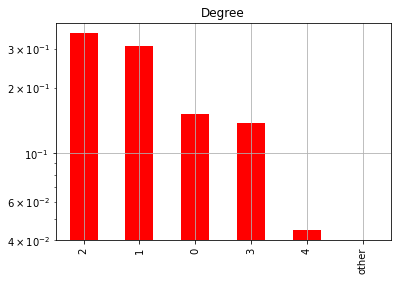

Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.319632
Cutoff (xmin)     = 11.000000

Log-likelihood    = -992.962833

H0: data was drawn from the fitted distribution

KS test statistic = 0.055038
p-value           = 0.412694

H0 could not be rejected at significance level 0.05


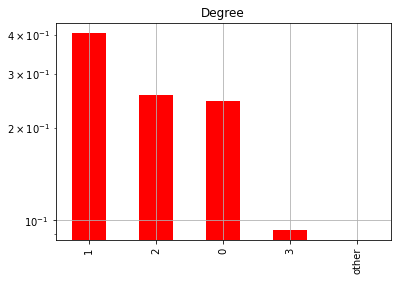

Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.390009
Cutoff (xmin)     = 6.000000

Log-likelihood    = -468.490058

H0: data was drawn from the fitted distribution

KS test statistic = 0.073757
p-value           = 0.384037

H0 could not be rejected at significance level 0.05


In [27]:
powerLaw(cancer1_Stats, cancer1_graph)
powerLaw(cancer2_Stats, cancer2_graph)
powerLaw(cancer3_Stats, cancer3_graph)
powerLaw(cancer4_Stats, cancer4_graph)
powerLaw(cancer5_Stats, cancer5_graph)
powerLaw(cancer6_Stats, cancer6_graph)
powerLaw(cancer7_Stats, cancer7_graph)
powerLaw(cancer8_Stats, cancer8_graph)
powerLaw(cancer9_Stats, cancer9_graph)
powerLaw(cancer10_Stats, cancer10_graph)

In [ ]:
communities(graph)

Size of maximal strongly connected component is 41441
Size of maximal weakly connected component is 119130
29732 37682 10275
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,

In [27]:
def richClubEffect(Stats, graph):
    
    # We want to see the rich club effect in the 100 edges with the highest indegree.
    picked = 100
    rce1 = Stats[['From','Indegree']].sort_values(by=['Indegree'], ascending=False)[0:picked]
    rich = list(rce1.From.values)
    rece_graph = graph.subgraph(rich).copy()
    # Dropping first value

    densities = np.zeros((3,picked))
    pos_edges = 0
    neg_edges = 0 
    for rank, node1 in enumerate(rich[1::]):

        for rank2, node2 in enumerate(rich[:rank+1]): 
            if graph.has_edge(node1, node2):
                if graph[node1][node2]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1
            if graph.has_edge(node2, node1):
                if graph[node2][node1]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1

        densities[0][rank] = pos_edges/(rank+2)/(rank+1)
        densities[1][rank] = neg_edges/(rank+2)/(rank+1)
        densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)

    plt.figure(figsize=(15, 5), dpi=80)
    plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density(+ve effect)')
    plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density(+ve effect)')
    #plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
    #plt.legend(loc="upper right")
    #plt.ylim((0,1))
    #plt.xlim((-2,picked-2))
    #plt.show()

    # Checking the one sidedness
    print(nx.reciprocity(rece_graph))
    
    
    
    # We want to see the rich club effect in the 100 edges with the highest negative_degree.
    picked = 100
    rce2 = Stats[['From','Neg_in']].sort_values(by=['Neg_in'], ascending=False)[4:picked+4]
    rich = list(rce2.From.values)
    rece_graph2 = graph.subgraph(rich).copy()
    # Dropping first value

    densities = np.zeros((3,picked))
    pos_edges = 0
    neg_edges = 0 

    for rank, node1 in enumerate(rich[1::]):

        for rank2, node2 in enumerate(rich[:rank+1]): 
            if graph.has_edge(node1, node2):
                if graph[node1][node2]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1
            if graph.has_edge(node2, node1):
                if graph[node2][node1]['weight'] == 1:
                    pos_edges += 1
                else:
                    neg_edges += 1


        densities[0][rank] = pos_edges/(rank+2)/(rank+1)
        densities[1][rank] = neg_edges/(rank+2)/(rank+1)
        densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)


    plt.plot( [i for i in range(0,picked)],densities[0,],'g-',label='Positive edge density(-ve effect)')
    plt.plot( [i for i in range(0,picked)],densities[1,],'m-',label='Negative edge density(-ve effect)')
    #plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
    plt.legend(loc="upper right")
    plt.ylim((0,1))
    plt.xlim((-2,picked-2))
    plt.title('Rich Club Effect', fontsize = 20)
    plt.grid()
    plt.ylim([0,0.6])
    plt.xlabel('Node Number')
    plt.ylabel('Density')
    plt.show()
    
    # Checking the one sidedness
    print(nx.reciprocity(rece_graph2))
    
    
    
#     # We want to see the rich club effect in the 100 edges with the highest outdegree.
#     picked = 100
#     rce3 = Stats[['From','Outdegree']].sort_values(by=['Outdegree'], ascending=False)[0:picked]
#     rich = list(rce3.From.values)
#     rece_graph3 = graph.subgraph(rich).copy()
#     # Dropping first value

#     densities = np.zeros((3,picked))
#     pos_edges = 0
#     neg_edges = 0 
#     for rank, node1 in enumerate(rich[1::]):

#         for rank2, node2 in enumerate(rich[:rank+1]): 
#             if graph.has_edge(node1, node2):
#                 if graph[node1][node2]['weight'] == 1:
#                     pos_edges += 1
#                 else:
#                     neg_edges += 1
#             if graph.has_edge(node2, node1):
#                 if graph[node2][node1]['weight'] == 1:
#                     pos_edges += 1
#                 else:
#                     neg_edges += 1

#         densities[0][rank] = pos_edges/(rank+2)/(rank+1)
#         densities[1][rank] = neg_edges/(rank+2)/(rank+1)
#         densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)


#     plt.plot( [i for i in range(0,picked)],densities[0,],'g-',label='Positive edge outdegree density')
#     plt.plot( [i for i in range(0,picked)],densities[1,],'m-',label='Negative edge outdegree density')
#     #plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
#     plt.legend(loc="upper right")
#     plt.ylim((0,1))
#     plt.xlim((-2,picked-2))
#     plt.title('Rich Club Effect')
#     plt.grid()
#     plt.ylim([0,0.6])
#     plt.show()

    # Checking the one sidedness
    #print(nx.reciprocity(rece_graph3))
    
    
#     # We want to see the rich club effect in the 100 edges with the highest negitive outdegree.
#     picked = 100
#     rce4 = Stats[['From','Neg_out']].sort_values(by=['Neg_out'], ascending=False)[0:picked]
#     rich = list(rce4.From.values)
#     rece_graph4 = graph.subgraph(rich).copy()
#     # Dropping first value

#     densities = np.zeros((3,picked))
#     pos_edges = 0
#     neg_edges = 0 
#     for rank, node1 in enumerate(rich[1::]):

#         for rank2, node2 in enumerate(rich[:rank+1]): 
#             if graph.has_edge(node1, node2):
#                 if graph[node1][node2]['weight'] == 1:
#                     pos_edges += 1
#                 else:
#                     neg_edges += 1
#             if graph.has_edge(node2, node1):
#                 if graph[node2][node1]['weight'] == 1:
#                     pos_edges += 1
#                 else:
#                     neg_edges += 1

#         densities[0][rank] = pos_edges/(rank+2)/(rank+1)
#         densities[1][rank] = neg_edges/(rank+2)/(rank+1)
#         densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)


#     plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density')
#     plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density')
#     plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
#     plt.legend(loc="upper right")
#     plt.ylim((0,1))
#     plt.xlim((-2,picked-2))
#     plt.show()

#     # Checking the one sidedness
#     print(nx.reciprocity(rece_graph4))

In [ ]:
def communities(graph):
    SCC = max(nx.strongly_connected_components(graph), key=len)
    print('Size of maximal strongly connected component is ' + str(len(SCC)))
    WCC = max(nx.weakly_connected_components(graph), key=len)
    print('Size of maximal weakly connected component is ' + str(len(WCC)))
    DIF = list(set(WCC)-set(SCC))
    OUT_C = []
    IN_C = []
    IN = 0
    OUT = 0
    for index, node1 in enumerate(DIF):
        for index2, node2 in enumerate(SCC):

            if graph.has_edge(node1,node2):
                OUT+=1
                OUT_C.append(node2)
                break
            elif graph.has_edge(node2,node1):
                IN+=1
                IN_C.append(node1)
                break


    TND = len(DIF)-IN-OUT
    print(IN,OUT,TND)
    
    SCC = max(nx.strongly_connected_components(graph), key=len)
    scc_com = graph.subgraph(SCC).copy()
    scc2 = nx.Graph(scc_com)

    # Removing the weights.

    for u,v,d in scc2.edges(data=True):
        d['weight']=1

    communities =community_louvain.best_partition(scc2,random_state=5)
    
    print(set(communities.values()))
    # node numver, community it belongs to
    # find size of all communities
    # group by val -> key.sum()
    
    ind_graph = community_louvain.induced_graph(communities, scc2)

    inv_map = dict()
    for key, value in communities.items():
        inv_map.setdefault(value, list()).append(key)

    # Removing the small communities

    inv_map2 = {key:val for key, val in inv_map.items() if len(val) >= 100}
    sizes = np.array([len(inv_map2[k]) for k in list(inv_map2.keys())])

    # Removing edges from the graph:

    inv_keys = [key for key in inv_map2]
    ind_nodes = list(ind_graph.nodes())
    for node in ind_nodes:
        if node not in inv_keys:
            ind_graph.remove_node(node)
            
    print(community_louvain.modularity(communities,scc2))
    print(sizes)

In [ ]:
def communitiesNewCode(graph):
    # compute the best partition
    partition = community_louvain.best_partition(graph)
    print(partition)
#     # draw the graph
#     pos = nx.spring_layout(graph)
#     # color the nodes according to their partition
#     cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
#     nx.draw_networkx_nodes(graph, pos, partition.keys(), node_size=40,
#                            cmap=cmap, node_color=list(partition.values()))
#     nx.draw_networkx_edges(graph, pos, alpha=0.5)
#     plt.show()

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.richclub.rich_club_coefficient.html#networkx.algorithms.richclub.rich_club_coefficient

In [66]:
print(nx.average_shortest_path_length(cancer1_graph))

3.082002442002442


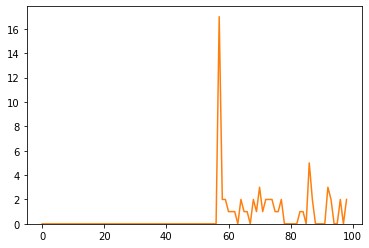

AttributeError: 'NoneType' object has no attribute 'is_multigraph'

In [31]:
ud_epi = cancer1_graph
ud_epi = ud_epi.remove_edges_from(nx.selfloop_edges(ud_epi))
rc = nx.rich_club_coefficient(cancer1_graph, normalized=True, seed=10)
n1,x1,_1 = plt.hist(rc.values(),bins=np.linspace(0, max(rc.values()), 100), visible = False)
plt.plot(n1)
plt.show()

ud_epi = cancer2_graph
ud_epi = ud_epi.remove_edges_from(nx.selfloop_edges(ud_epi))
rc = nx.rich_club_coefficient(ud_epi, normalized=True, seed=10)
n1,x1,_1 = plt.hist(rc.values(),bins=np.linspace(0, max(rc.values()), 100), visible = False)
plt.plot(n1)
plt.show()

ud_epi = cancer3_graph
ud_epi = ud_epi.remove_edges_from(nx.selfloop_edges(ud_epi))
rc = nx.rich_club_coefficient(cancer3_graph, normalized=True, seed=10)
n1,x1,_1 = plt.hist(rc.values(),bins=np.linspace(0, max(rc.values()), 100), visible = False)
plt.plot(n1)
plt.show()

ud_epi = cancer4_graph
ud_epi = ud_epi.remove_edges_from(nx.selfloop_edges(ud_epi))
rc = nx.rich_club_coefficient(cancer4_graph, normalized=True, seed=10)
n1,x1,_1 = plt.hist(rc.values(),bins=np.linspace(0, max(rc.values()), 100), visible = False)
plt.plot(n1)
plt.show()

ud_epi = cancer5_graph
ud_epi = ud_epi.remove_edges_from(nx.selfloop_edges(ud_epi))
rc = nx.rich_club_coefficient(cancer5_graph, normalized=True, seed=10)
n1,x1,_1 = plt.hist(rc.values(),bins=np.linspace(0, max(rc.values()), 100), visible = False)
plt.plot(n1)
plt.show()

ud_epi = cancer6_graph
ud_epi = ud_epi.remove_edges_from(nx.selfloop_edges(ud_epi))
rc = nx.rich_club_coefficient(cancer6_graph, normalized=True, seed=10)
n1,x1,_1 = plt.hist(rc.values(),bins=np.linspace(0, max(rc.values()), 100), visible = False)
plt.plot(n1)
plt.show()

ud_epi = cancer7_graph
ud_epi = ud_epi.remove_edges_from(nx.selfloop_edges(ud_epi))
rc = nx.rich_club_coefficient(cancer7_graph, normalized=True, seed=10)
n1,x1,_1 = plt.hist(rc.values(),bins=np.linspace(0, max(rc.values()), 100), visible = False)
plt.plot(n1)
plt.show()

ud_epi = cancer8_graph
ud_epi = ud_epi.remove_edges_from(nx.selfloop_edges(ud_epi))
rc = nx.rich_club_coefficient(cancer8_graph, normalized=True, seed=10)
n1,x1,_1 = plt.hist(rc.values(),bins=np.linspace(0, max(rc.values()), 100), visible = False)
plt.plot(n1)
plt.show()

ud_epi = cancer9_graph
ud_epi = ud_epi.remove_edges_from(nx.selfloop_edges(ud_epi))
rc = nx.rich_club_coefficient(cancer9_graph, normalized=True, seed=10)
n1,x1,_1 = plt.hist(rc.values(),bins=np.linspace(0, max(rc.values()), 100), visible = False)
plt.plot(n1)
plt.show()

ud_epi = cancer10_graph
ud_epi = ud_epi.remove_edges_from(nx.selfloop_edges(ud_epi))
rc = nx.rich_club_coefficient(cancer10_graph, normalized=True, seed=10)
n1,x1,_1 = plt.hist(rc.values(),bins=np.linspace(0, max(rc.values()), 100), visible = False)
plt.plot(n1)
plt.show()

In [69]:
allD = pd.read_csv('BoneCancer_ALLDATA.csv', delimiter=',')
allD

,betweenness,closeness,degree,eigenvector,khatz
0,SMAD3,STAT1,STAT1,STAT1,CDK2
1,FYN,SMAD3,FYN,FYN,CCNB1
2,HDAC1,ERK1,SMAD3,STAT5B,CCNB2
3,CTNNB1,FYN,STAT5B,SRC,FZR1
4,STAT5B,STAT5B,ERK1,LYN,CCNA2
...,...,...,...,...,...
95,NUP153,MYC,TAB2,DAXX,FOXO1A
96,AIP4,RALBP1,NCOR1,CD44,TFDP2
97,ERK2,CDK7,PPP2CA,CLTC,TIP1
98,SPRY2,PKN1,FHL2,CDK4,SNX4


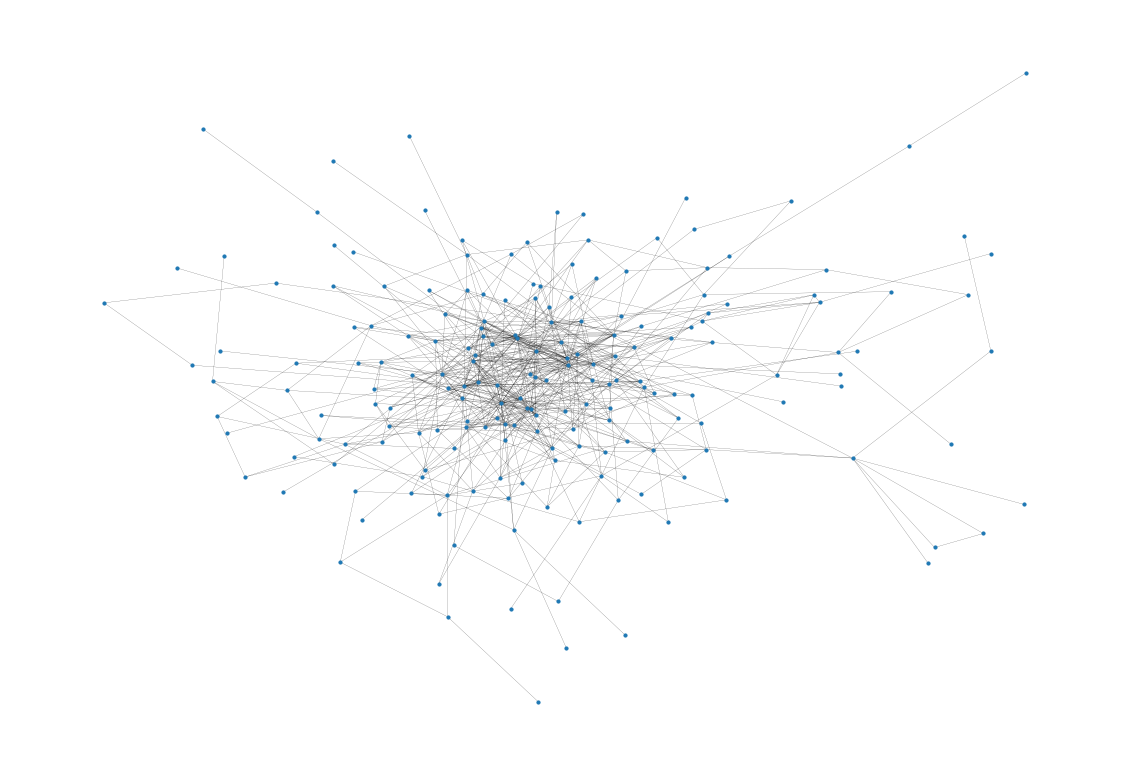

In [35]:
pos = nx.spring_layout(cancer2_graph, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(cancer2_graph, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15)

In [32]:
len(c2_connected_graph.nodes())

327

In [33]:
c2_connected_graph = connectedComp(cancer1_graph)
len(c2_connected_graph.nodes())

351

In [33]:
def makeDictionary(stats, name):
    Dictionary = pd.DataFrame(stats['From'])
    Dictionary['Index'] = range(1, len(Dictionary) + 1)
    Dictionary.to_csv(name+'Dictionary.csv', index=False)
    dictCSV = pd.DataFrame(cancer1_csv)
    dictCSV = dictCSV.drop('Weight', 1)
    dictCSV = dictCSV.replace(dict(zip(Dictionary['From'], Dictionary['Index'])))
    dictCSV.to_csv(name+'-Dictionary.txt', index=False, sep= '\t')

In [34]:
makeDictionary(cancer1_Stats, 'BoneCancer')
makeDictionary(cancer2_Stats, 'BoneNormal')
makeDictionary(cancer3_Stats, 'BreastCancer')
makeDictionary(cancer4_Stats, 'BreastNormal')
makeDictionary(cancer5_Stats, 'ColonCancer')
makeDictionary(cancer6_Stats, 'ColonCancer')
makeDictionary(cancer7_Stats, 'KidnerCancer')
makeDictionary(cancer8_Stats, 'KidneyNormal')
makeDictionary(cancer9_Stats, 'LiverCancer')
makeDictionary(cancer10_Stats, 'LiverNormal')